<a href="https://colab.research.google.com/github/ejdelrosario/deep-learning/blob/main/SVHN_PyTorch_timm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training Three Models on the SVHN Core Dataset using the PyTorch `timm` Module**




In this notebook, three select models -- `densenet121`, `densenet169`, and `densenet264` -- from the `timm` module, were trained on the Street View House Numbers (SVHN) dataset (http://ufldl.stanford.edu/housenumbers/).

In [1]:
!pip install timm
import timm

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
train_set = datasets.SVHN(root = 'data/',
                          split = 'train',
                          download = True,
                          transform = transforms.ToTensor())

test_set = datasets.SVHN(root = 'data/',
                        split = 'test',
                        download = True,
                        transform = transforms.ToTensor())

batch_size = 256

train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           num_workers = 2)

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = 2)

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/test_32x32.mat


In [3]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        
        X = X.to(device)
        y = y.to(device)
        # Compute prediction and loss
        
        with torch.set_grad_enabled(True):
          pred = model(X)
          pred_max = torch.max(pred, 1)[1]
          loss = loss_fn(pred, y)

          # Backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        if batch % 50 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return model

In [4]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return model, [correct], [test_loss]

## **[Model 1] densenet121**



In [5]:
model1 = timm.create_model('densenet121')
in_features = model1.classifier.in_features
num_class = 10
model1.classifier = nn.Sequential(nn.Linear(in_features, 512, bias = True),
                                  nn.Linear(512, num_class, bias = True),
                                  nn.LogSoftmax(dim=1))

model1 = model1.to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model1.parameters(), lr = 0.001)

accuracy1 = []
loss1 = []

epochs = 10

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  model1 = train_loop(train_loader, model1, loss_fn, optimizer)
  model1, correct, test_loss = test_loop(test_loader, model1, loss_fn)
  accuracy1.append(correct)
  loss1.append(test_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.312068  [    0/73257]
loss: 1.852007  [12800/73257]
loss: 0.983982  [25600/73257]
loss: 0.724891  [38400/73257]
loss: 0.587045  [51200/73257]
loss: 0.665011  [64000/73257]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.002478 

Epoch 2
-------------------------------
loss: 0.553240  [    0/73257]
loss: 0.434433  [12800/73257]
loss: 0.454799  [25600/73257]
loss: 0.324113  [38400/73257]
loss: 0.361226  [51200/73257]
loss: 0.221620  [64000/73257]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.001588 

Epoch 3
-------------------------------
loss: 0.314618  [    0/73257]
loss: 0.372058  [12800/73257]
loss: 0.331662  [25600/73257]
loss: 0.301544  [38400/73257]
loss: 0.281987  [51200/73257]
loss: 0.268058  [64000/73257]
Test Error: 
 Accuracy: 87.6%, Avg loss: 0.001538 

Epoch 4
-------------------------------
loss: 0.234127  [    0/73257]
loss: 0.270979  [12800/73257]
loss: 0.273338  [25600/73257]
loss: 0.320654  [38400/73257]
loss: 0.359589  [51200/7

Text(0.5, 1.0, 'densenet121 Test Accuracy')

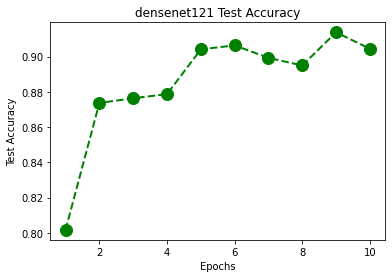

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, epochs + 1), accuracy1, color='green', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title("densenet121 Test Accuracy")

Text(0.5, 1.0, 'densenet121 Test Loss')

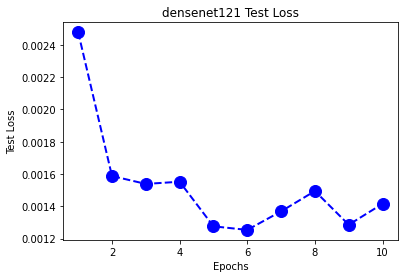

In [7]:
%matplotlib inline
plt.plot(range(1, epochs + 1), loss1, color='blue', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title("densenet121 Test Loss")

## **[Model 2] densenet169**

In [8]:
model2 = timm.create_model('densenet169')
in_features = model2.classifier.in_features
num_class = 10
model2.classifier = nn.Sequential(nn.Linear(in_features, 512, bias = True),
                                  nn.Linear(512, num_class, bias = True),
                                  nn.LogSoftmax(dim=1))

model2 = model2.to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model2.parameters(), lr = 0.001)

accuracy2 = []
loss2 = []

epochs = 10

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  model2 = train_loop(train_loader, model2, loss_fn, optimizer)
  model2, correct, test_loss = test_loop(test_loader, model2, loss_fn)
  accuracy2.append(correct)
  loss2.append(test_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.343532  [    0/73257]
loss: 2.180961  [12800/73257]
loss: 1.534752  [25600/73257]
loss: 0.816956  [38400/73257]
loss: 0.727940  [51200/73257]
loss: 0.714979  [64000/73257]
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.002501 

Epoch 2
-------------------------------
loss: 0.607386  [    0/73257]
loss: 0.557364  [12800/73257]
loss: 0.538116  [25600/73257]
loss: 0.351583  [38400/73257]
loss: 0.382424  [51200/73257]
loss: 0.390209  [64000/73257]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.002026 

Epoch 3
-------------------------------
loss: 0.432202  [    0/73257]
loss: 0.341696  [12800/73257]
loss: 0.381912  [25600/73257]
loss: 0.331614  [38400/73257]
loss: 0.331270  [51200/73257]
loss: 0.447907  [64000/73257]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.001642 

Epoch 4
-------------------------------
loss: 0.378062  [    0/73257]
loss: 0.282918  [12800/73257]
loss: 0.300733  [25600/73257]
loss: 0.194718  [38400/73257]
loss: 0.259591  [51200/7

Text(0.5, 1.0, 'densenet169 Test Accuracy')

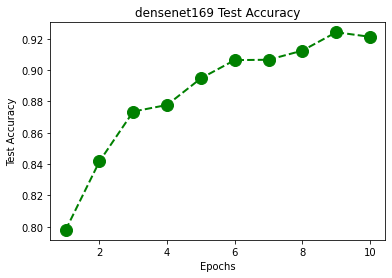

In [9]:
%matplotlib inline
plt.plot(range(1, epochs + 1), accuracy2, color='green', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title("densenet169 Test Accuracy")

Text(0.5, 1.0, 'densenet169 Test Loss')

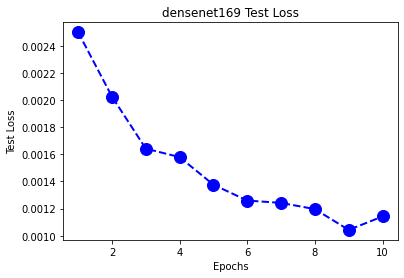

In [10]:
%matplotlib inline
plt.plot(range(1, epochs + 1), loss2, color='blue', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title("densenet169 Test Loss")

## **[Model 3] densenet264**

In [11]:
model3 = timm.create_model('densenet264')
in_features = model3.classifier.in_features
num_class = 10
model3.classifier = nn.Sequential(nn.Linear(in_features, 512, bias = True),
                                  nn.Linear(512, num_class, bias = True),
                                  nn.LogSoftmax(dim=1))

model3 = model3.to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model3.parameters(), lr = 0.001)

accuracy3 = []
loss3 = []

epochs = 10

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  model3 = train_loop(train_loader, model3, loss_fn, optimizer)
  model3, correct, test_loss = test_loop(test_loader, model3, loss_fn)
  accuracy3.append(correct)
  loss3.append(test_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.341117  [    0/73257]
loss: 2.288813  [12800/73257]
loss: 2.575576  [25600/73257]
loss: 2.144743  [38400/73257]
loss: 1.962450  [51200/73257]
loss: 1.421082  [64000/73257]
Test Error: 
 Accuracy: 48.1%, Avg loss: 0.010507 

Epoch 2
-------------------------------
loss: 1.250801  [    0/73257]
loss: 0.969598  [12800/73257]
loss: 0.956349  [25600/73257]
loss: 0.672221  [38400/73257]
loss: 0.659206  [51200/73257]
loss: 0.557073  [64000/73257]
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.002588 

Epoch 3
-------------------------------
loss: 0.585952  [    0/73257]
loss: 0.462352  [12800/73257]
loss: 0.366300  [25600/73257]
loss: 0.344315  [38400/73257]
loss: 0.449148  [51200/73257]
loss: 0.526502  [64000/73257]
Test Error: 
 Accuracy: 81.3%, Avg loss: 0.002425 

Epoch 4
-------------------------------
loss: 0.505342  [    0/73257]
loss: 0.480777  [12800/73257]
loss: 0.265576  [25600/73257]
loss: 0.407608  [38400/73257]
loss: 0.301647  [51200/7

Text(0.5, 1.0, 'densenet264 Test Accuracy')

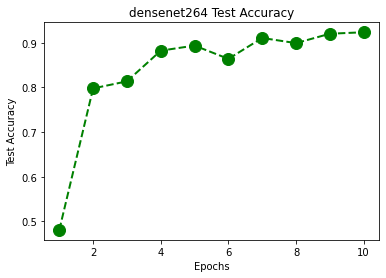

In [12]:
%matplotlib inline
plt.plot(range(1, epochs + 1), accuracy3, color='green', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title("densenet264 Test Accuracy")

Text(0.5, 1.0, 'densenet264 Test Loss')

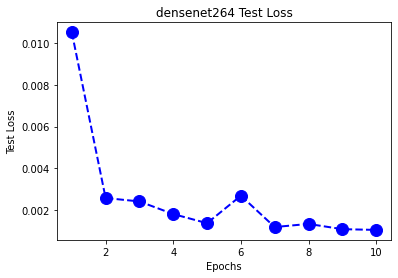

In [13]:
%matplotlib inline
plt.plot(range(1, epochs + 1), loss3, color='blue', marker='o', linestyle='dashed', linewidth = 2, markersize = 12, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title("densenet264 Test Loss")

# **Summary**

1. **densenet121:** 90.4% test accuracy in 10 epochs.
2. **densenet169:** 92.1% test accuracy in 10 epochs.
3. **densenet264:** 92.3% test accuracy in 10 epochs.




